In [1]:
import sys
import os
sys.path.append('../')

In [2]:
import openfermion
from utils import MOLECULES_DIR, load_data, JSON_DIR
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lambdas_list = []
for fn in tqdm(os.listdir(MOLECULES_DIR)):
    molecule = openfermion.MolecularData(filename = MOLECULES_DIR + fn)
    lambdas, _, _, _ = openfermion.low_rank_two_body_decomposition(
        molecule.two_body_integrals, final_rank = 16, spin_basis = False)
    lambdas_list.append(lambdas)
lambdas_list = np.array(lambdas_list)

In [4]:
hf_errors = []
for fn in tqdm(os.listdir(JSON_DIR)):
    d = load_data(JSON_DIR + fn)
    hf_errors.append( d['hf_energy'] - d['exact_energy'] )

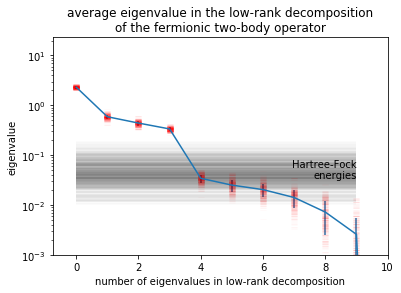

In [5]:
avg_lambdas = np.mean(lambdas_list, 0)
std_lambdas = np.std(lambdas_list, 0)
plt.errorbar(np.arange(16), avg_lambdas, yerr = std_lambdas)
plt.plot(np.arange(16), lambdas_list.T, 'r_', alpha = 0.02)
plt.yscale('log')
plt.ylim(bottom=1e-3)
plt.xlim(right=10)
plt.hlines(hf_errors, 0, 9, alpha = 0.02)
plt.annotate('Hartree-Fock\nenergies', (9, np.average(hf_errors)), ha='right', va='center')
plt.xlabel('number of eigenvalues in low-rank decomposition')
plt.ylabel('eigenvalue')
plt.title('average eigenvalue in the low-rank decomposition\n'
          'of the fermionic two-body operator')
plt.show()